In [13]:
from prophet import Prophet

In [14]:
import pandas as pd

In [15]:
from prophet.plot import add_changepoints_to_plot,plot_plotly,plot_components_plotly

In [33]:
import matplotlib.pyplot as plt

In [16]:
# Read the data from a CSV file
df = pd.read_csv(r'C:\Users\ADMIN\Desktop\Coffee_Productivity.csv')

In [17]:
df.head()

,ds,y
0,01-10-1985,667
1,01-10-1986,820
2,01-10-1987,595
3,01-10-1988,874
4,01-10-1989,577


In [18]:
df.tail()

,ds,y
32,01-10-2017,478
33,01-10-2018,470
34,01-10-2019,427
35,01-10-2020,478
36,01-10-2021,448


In [19]:
df['ds']=pd.to_datetime(df['ds'])

<AxesSubplot:xlabel='ds'>

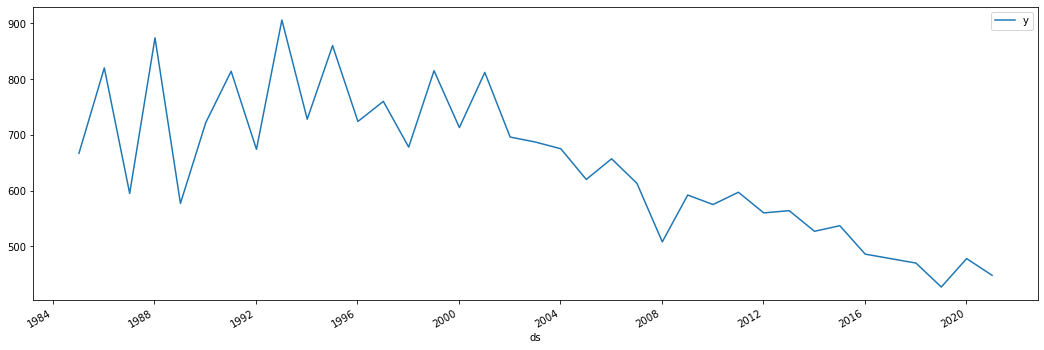

In [20]:
df.plot(x='ds',y='y',figsize=(18,6))

In [21]:
pip show scipy 

Name: scipy
Version: 1.8.1
Summary: SciPy: Scientific Library for Python
Home-page: https://www.scipy.org
Author: 
Author-email: 
License: BSD
Location: d:\users\admin\anaconda3\lib\site-packages
Requires: numpy
Required-by: statsmodels, seaborn, scikit-learn, scikit-image, glue-vispy-viewers, glue-core
Note: you may need to restart the kernel to use updated packages.


In [22]:
 from scipy.signal._signaltools import _centered

In [23]:
 pip install statsmodels --upgrade

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'D:\Users\ADMIN\anaconda3\python.exe -m pip install --upgrade pip' command.


In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose

<AxesSubplot:>

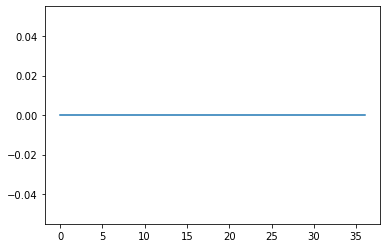

In [25]:
result=seasonal_decompose(df['y'], model='additionable', period=1)
result.seasonal.plot()

In [26]:
# Create a Prophet model
model = Prophet()

In [28]:
# Add custom seasonal component (if needed)
model.add_seasonality(name='yearly', period=365.25, fourier_order=10)

In [29]:
# Fit the model to the data
model.fit(df)

18:52:07 - cmdstanpy - INFO - Chain [1] start processing
18:52:07 - cmdstanpy - INFO - Chain [1] done processing


In [30]:
# Specify the number of periods to forecast
future = model.make_future_dataframe(periods=10, freq='Y')

In [31]:
# Make predictions
forecast = model.predict(future)

1    1986-01-10
2    1987-01-10
3    1988-01-10
4    1989-01-10
6    1991-01-10
7    1992-01-10
8    1993-01-10
9    1994-01-10
10   1995-01-10
11   1996-01-10
12   1997-01-10
13   1998-01-10
15   2000-01-10
16   2001-01-10
17   2002-01-10
18   2003-01-10
19   2004-01-10
20   2005-01-10
21   2006-01-10
22   2007-01-10
24   2009-01-10
25   2010-01-10
26   2011-01-10
27   2012-01-10
28   2013-01-10
Name: ds, dtype: datetime64[ns]


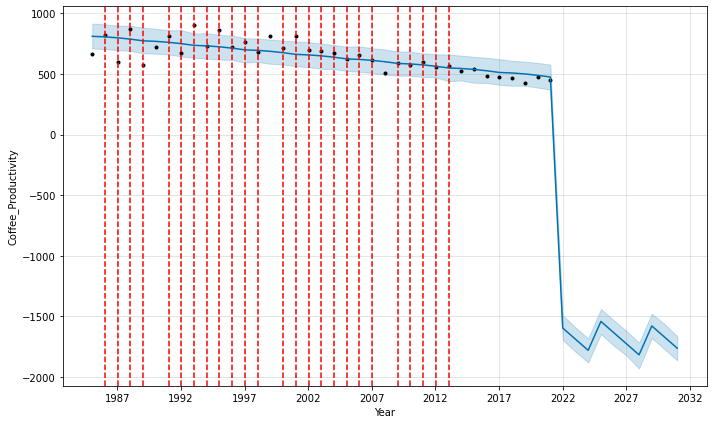

In [34]:
# Generate changepoint statistics
changepoints = model.changepoints

# Print the changepoints
print(changepoints)

# Plot the changepoints
fig = model.plot(forecast)
plt.xlabel('Year')
plt.ylabel('Coffee_Productivity')

# Add vertical lines at the changepoints
for changepoint in changepoints:
    plt.axvline(changepoint, linestyle='--', color='r')

plt.show()

In [114]:
# Print the forecasted values
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

           ds         yhat   yhat_lower   yhat_upper
0  1986-01-10   819.128594   719.585474   927.491516
1  1987-01-10   802.163989   702.194050   897.644168
2  1988-01-10   782.920953   676.107709   891.977539
3  1989-01-10   795.051435   698.786083   894.996652
4  1990-01-10   780.372018   678.963001   881.400808
5  1991-01-10   763.407413   667.035530   864.796175
6  1992-01-10   744.164377   639.830656   845.387831
7  1993-01-10   756.294859   656.410275   858.436368
8  1994-01-10   741.615442   639.650986   839.135545
9  1995-01-10   724.650783   628.714535   831.242374
10 1996-01-10   705.407693   601.810239   803.703585
11 1997-01-10   717.538120   616.970451   810.909145
12 1998-01-10   702.858552   609.512777   798.642472
13 1999-01-10   685.891502   589.067359   787.731000
14 2000-01-10   666.646021   561.137312   764.675507
15 2001-01-10   678.766641   581.225698   776.972335
16 2002-01-10   664.070091   561.858153   769.414188
17 2003-01-10   647.084300   544.637223   747.

In [116]:
plot_plotly(model,forecast)

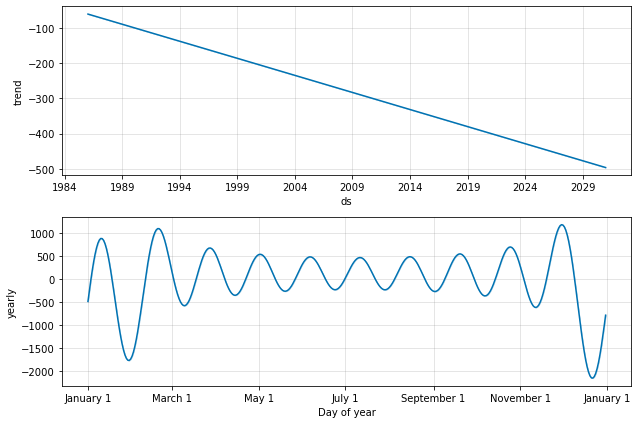

In [117]:
fig2 = model.plot_components(forecast)

In [118]:
from statsmodels.tools.eval_measures import rmse

In [119]:
# Extract the actual and predicted values
actual_values = df['y']
predicted_values = forecast['yhat'].values[:len(actual_values)]

In [120]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [121]:
# Calculate MAE, MSE, and MAPE
mae = mean_absolute_error(actual_values, predicted_values)
mse = mean_squared_error(actual_values, predicted_values)
mape = (abs(actual_values - predicted_values) / actual_values).mean() * 100

In [122]:
print("MAE:", mae)
print("MSE:", mse)
print("MAPE:", mape)

MAE: 101.70203764367523
MSE: 79586.19208510262
MAPE: 18.434824667958754


In [99]:
rmse(predicted_values,df['y'])

282.1102481036494